In [11]:
# blackjack_neat.py
%matplotlib inline

import gymnasium as gym
import neat
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt


Plots the graph of the learning progress.

In [12]:
def plot_neat_stats(stats, title):
    generations = range(len(stats.most_fit_genomes))
    best_fitness = [g.fitness for g in stats.most_fit_genomes]
    avg_fitness = stats.get_fitness_mean()

    plt.figure(figsize=(10, 5))
    plt.plot(generations, best_fitness, label="Best Fitness")
    plt.plot(generations, avg_fitness, label="Average Fitness")
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()


Implementation of Black Jack using NEAT.
Action space - 2 actions
- 0 do not draw more
- 1 hit

Observable variables
- 0 players cards sum
- 1 dealers cards sum
- 2 usable ace

We normalize those inputs be dividing it by 32 - maximum you can achieve

Rewards are:
- +1 for winning
- 0  draw
- -1 lose

Training is done using 150 agents in 20 generations where in each generation 1000 games are played by each agent.

node_add_prob = 0.3
node_delete_prob = 0.2
elitism = 4
activation function = sigmoid

On average, we reached a winrate of 41% which is not perfect in the game of blackjack but close to it.






 ****** Running generation 0 ****** 

Population's average fitness: -610.02000 stdev: 373.74138
Best fitness: -109.00000 - size: (1, 3) - species 1 - id 137
Average adjusted fitness: 0.438
Mean genetic distance 1.209, standard deviation 0.446
Population of 150 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0   150   -109.0    0.438     0
Total extinctions: 0
Generation time: 9.827 sec

 ****** Running generation 1 ****** 

Population's average fitness: -346.22667 stdev: 301.92379
Best fitness: -67.00000 - size: (1, 2) - species 1 - id 156
Average adjusted fitness: 0.701
Mean genetic distance 1.458, standard deviation 0.410
Population of 150 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1   150    -67.0    0.701     0
Total extinctions: 0
Generation time: 7.766 sec (8.797 average)

 ****** Running generation 2 ****** 

Population's average fitness: 

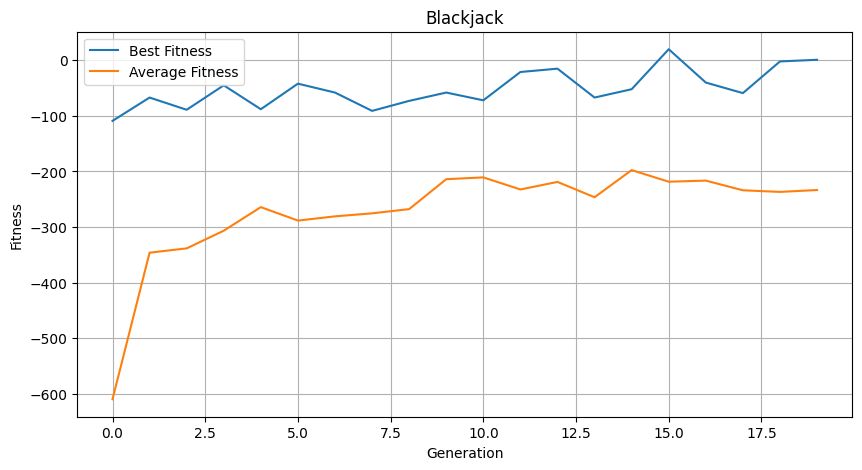

Win rate: 41.40%


In [13]:
GENERATIONS_BLACKJACK = 20
GAMES_IN_GENERATION_BLACKJACK = 1000

def eval_genomes_blackjack(genomes, config):
    for genome_id, genome in genomes:
        genome.fitness = 0.0
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        reward = 0
        for _ in range(GAMES_IN_GENERATION_BLACKJACK):
            obs, _ = blackjack_env.reset()
            done = False

            while not done:
                player_sum, dealer_card, usable_ace = obs
                inputs = np.array([
                    player_sum / 32.0,
                    dealer_card / 32.0,
                    1.0 if usable_ace else 0.0
                ])

                output = net.activate(inputs)
                action = int(output[0] > 0.5)
                obs, reward, terminated, truncated, _ = blackjack_env.step(action)
                done = terminated or truncated

            genome.fitness += reward

def run_neat_blackjack(config_path):
    config = neat.Config(
        neat.DefaultGenome,
        neat.DefaultReproduction,
        neat.DefaultSpeciesSet,
        neat.DefaultStagnation,
        config_path
    )

    population = neat.Population(config)
    stats = neat.StatisticsReporter()
    population.add_reporter(neat.StdOutReporter(True))
    population.add_reporter(stats)

    winner = population.run(eval_genomes_blackjack,GENERATIONS_BLACKJACK)

    print("Blackjack training complete")
    plot_neat_stats(stats, title="Blackjack")
    test_winner_blackjack(winner, config)

# Create blackjack training env
blackjack_env = gym.make("Blackjack-v1")
run_neat_blackjack("config-feedforward")


Testing of the agent after training on 1000 games.

In [14]:
def test_winner_blackjack(winner, config, episodes=1000):
    env_test = gym.make("Blackjack-v1")
    net = neat.nn.FeedForwardNetwork.create(winner, config)

    win_count = 0
    reward = 0

    for i in range(episodes):
        obs, _ = env_test.reset()
        done = False

        while not done:
            player_sum, dealer_card, usable_ace = obs
            inputs = np.array([
                player_sum / 32.0,
                dealer_card / 11.0,
                1.0 if usable_ace else 0.0
            ])

            output = net.activate(inputs)
            action = int(output[0] > 0.5)
            obs, reward, terminated, truncated, _ = env_test.step(action)
            done = terminated or truncated

        if reward == 1:
            win_count += 1

    win_rate = win_count / episodes
    print(f"Win rate: {win_rate:.2%}")


Implementation of Lunar Lander using NEAT.
Action space - 2 actions
- 0 do nothing
- 1 left engine
- 2 main engine
- 3 right engine

Observable variables
- positions x y
- velocity x y
- angle
- angular velocity
- 2 ground contact flags

Rewards are:
- +100 +140 for successful landing
- -100 crashing
- additional rewards for smooth descent

Training is done using 100 agents in 100 generations where in each generation 25 landings are simulated by each agent.

elitism = 5
activation function = tanh
conn_add_prob = 0.5
conn_delete_prob = 0.5
node_add_prob = 0.2
node_delete_prob = 0.2


fitness threshold is set such that it is never reached because we want tha maximum amount of training and no early stopping.

We also save the trained model locally such that we do not have to train the model every time. But it can be just loaded to test the landings.

After the training is done 5 landings are shown. On average after training I was able to reach around 250 score in landings. Which is perfect as the best score you can achieve is 300 and in the show landings we can see that those landings are perfect.


 ****** Running generation 0 ****** 

Population's average fitness: -11681.65215 stdev: 5797.64871
Best fitness: -2975.20688 - size: (4, 32) - species 1 - id 55
Average adjusted fitness: 0.675
Mean genetic distance 1.016, standard deviation 0.201
Population of 100 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0   100  -2975.2    0.675     0
Total extinctions: 0
Generation time: 7.605 sec

 ****** Running generation 1 ****** 

Population's average fitness: -7421.44024 stdev: 5251.74666
Best fitness: -1427.32326 - size: (4, 31) - species 1 - id 188
Average adjusted fitness: 0.736
Mean genetic distance 1.034, standard deviation 0.186
Population of 100 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1   100  -1427.3    0.736     0
Total extinctions: 0
Generation time: 6.640 sec (7.123 average)

 ****** Running generation 2 ****** 

Population's average 

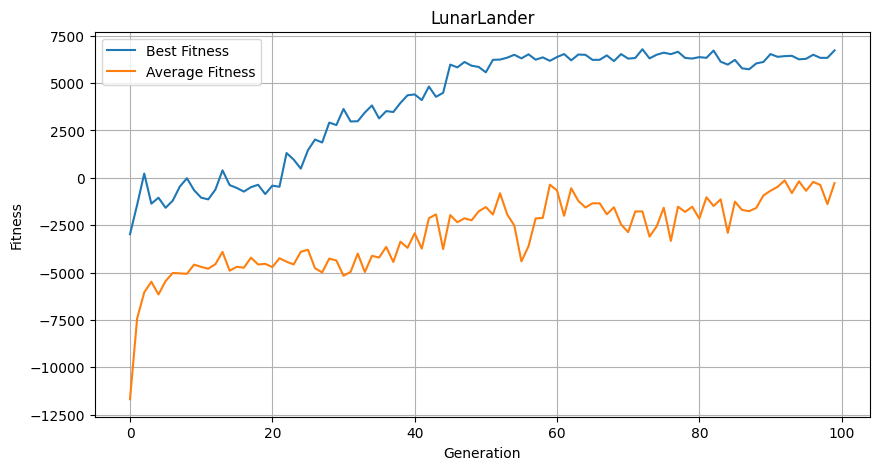


Landing 1
reward: 249.07

Landing 2
reward: 247.66

Landing 3
reward: 291.72

Landing 4
reward: 279.05

Landing 5
reward: 67.50


In [18]:
TRAIN_EPISODES_LUNAR = 25
GENERATIONS_LUNAR = 100

def eval_genomes_lunar(genomes, config):
    for genome_id, genome in genomes:
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        genome.fitness = 0.0

        for _ in range(TRAIN_EPISODES_LUNAR):
            obs, _ = lunar_env.reset()
            done = False
            total_reward = 0

            while not done:
                output = net.activate(obs)
                action = np.argmax(output)
                obs, reward, terminated, truncated, _ = lunar_env.step(action)
                done = terminated or truncated
                total_reward += reward
            genome.fitness += total_reward


def test_winner_lunar(winner, config, episodes=5):
    env_test = gym.make("LunarLander-v3", render_mode="human")
    net = neat.nn.FeedForwardNetwork.create(winner, config)

    for i in range(episodes):
        obs, _ = env_test.reset()
        done = False
        total_reward = 0
        print(f"\nLanding {i + 1}")

        while not done:
            output = net.activate(obs)
            action = np.argmax(output)
            obs, reward, terminated, truncated, _ = env_test.step(action)
            done = terminated or truncated
            total_reward += reward

        print(f"reward: {total_reward:.2f}")

    env_test.close()


def run_neat_lunar(config_path, skip_training=False):
    config = neat.Config(
        neat.DefaultGenome,
        neat.DefaultReproduction,
        neat.DefaultSpeciesSet,
        neat.DefaultStagnation,
        config_path
    )

    model_path = "lunarlander_winner.pkl"

    if skip_training and os.path.exists(model_path):
        with open(model_path, "rb") as f:
            winner = pickle.load(f)
        test_winner_lunar(winner, config)
        return

    population = neat.Population(config)
    stats = neat.StatisticsReporter()
    population.add_reporter(neat.StdOutReporter(True))
    population.add_reporter(stats)

    winner = population.run(eval_genomes_lunar, GENERATIONS_LUNAR)

    with open(model_path, "wb") as f:
        pickle.dump(winner, f)

    plot_neat_stats(stats, title="LunarLander")
    test_winner_lunar(winner, config)

# Create lunar lander training env
lunar_env = gym.make("LunarLander-v3")
run_neat_lunar("config-feedforward_lunarLander", skip_training=False)


Lunar Lander Config copy

[NEAT]
fitness_criterion     = max
fitness_threshold     = 5000000
pop_size              = 100
reset_on_extinction   = False

[DefaultGenome]
# Node structure
num_inputs              = 8
num_outputs             = 4
num_hidden              = 0
feed_forward            = True
initial_connection      = full

# Activation and aggregation
# Activation settings
activation_default      = tanh
activation_mutate_rate  = 0.0
activation_options      = tanh

# Aggregation settings
aggregation_default     = sum
aggregation_mutate_rate = 0.0
aggregation_options     = sum


# Bias settings
bias_init_mean          = 0.0
bias_init_stdev         = 1.0
bias_max_value          = 30.0
bias_min_value          = -30.0
bias_mutate_power       = 0.5
bias_mutate_rate        = 0.7
bias_replace_rate       = 0.1

# Connection weight settings
weight_init_mean        = 0.0
weight_init_stdev       = 1.0
weight_max_value        = 30.0
weight_min_value        = -30.0
weight_mutate_power     = 0.5
weight_mutate_rate      = 0.8
weight_replace_rate     = 0.1

# Response (not really used in FF networks but still required)
response_init_mean      = 1.0
response_init_stdev     = 0.0
response_max_value      = 30.0
response_min_value      = -30.0
response_mutate_power   = 0.0
response_mutate_rate    = 0.0
response_replace_rate   = 0.0

# Connection and node mutation rates
conn_add_prob           = 0.5
conn_delete_prob        = 0.5
node_add_prob           = 0.2
node_delete_prob        = 0.2

# Enable/disable connections
enabled_default         = True
enabled_mutate_rate     = 0.01

# Speciation
compatibility_disjoint_coefficient = 1.0
compatibility_weight_coefficient   = 0.5

[DefaultSpeciesSet]
compatibility_threshold = 3.0

[DefaultStagnation]
species_fitness_func = max
max_stagnation       = 20
species_elitism      = 2

[DefaultReproduction]
elitism            = 5
survival_threshold = 0.2








BlackJack Config file Copy
[NEAT]
# Goal: reach a good average score
fitness_criterion     = max
fitness_threshold     = 2500
pop_size              = 150
reset_on_extinction   = False

[DefaultGenome]
# node activation options
activation_default      = sigmoid
activation_mutate_rate  = 0.0
activation_options      = sigmoid

# node aggregation options
aggregation_default     = sum
aggregation_mutate_rate = 0.0
aggregation_options     = sum

# node bias options
bias_init_mean          = 0.0
bias_init_stdev         = 1.0
bias_max_value          = 30.0
bias_min_value          = -30.0
bias_mutate_power       = 0.5
bias_mutate_rate        = 0.7
bias_replace_rate       = 0.1

# genome compatibility options
compatibility_disjoint_coefficient = 1.0
compatibility_weight_coefficient   = 0.5

# connection add/remove rates
conn_add_prob           = 0.2
conn_delete_prob        = 0.2

# connection enable options
enabled_default         = True
enabled_mutate_rate     = 0.11

feed_forward            = True
initial_connection      = full

# node add/remove rates
node_add_prob           = 0.3
node_delete_prob        = 0.2

# network parameters
num_hidden              = 0
num_inputs              = 3
num_outputs             = 1

# node response options
response_init_mean      = 1.0
response_init_stdev     = 0.0
response_max_value      = 40.0
response_min_value      = -30.0
response_mutate_power   = 0.1
response_mutate_rate    = 0.1
response_replace_rate   = 0.1

# connection weight options
weight_init_mean        = 0.0
weight_init_stdev       = 1.0
weight_max_value        = 30
weight_min_value        = -30
weight_mutate_power     = 0.5
weight_mutate_rate      = 0.5
weight_replace_rate     = 0.1

[DefaultSpeciesSet]
compatibility_threshold = 3.0

[DefaultStagnation]
species_fitness_func = max
max_stagnation       = 20
species_elitism      = 3

[DefaultReproduction]
elitism            = 4
survival_threshold = 0.3

